Analysis of isostasy based on litho1pt0

### Dataset
- [Litho1.0](https://github.com/underworldcode/litho1pt0) (Global model of lithospheric properties that builds upon Crust 1.0)

### Reference
- Pasyanos, M. E., Masters, T. G., Laske, G., & Ma, Z. (2014). LITHO1. 0: An updated crust and lithospheric model of the Earth. Journal of Geophysical Research: Solid Earth, 119(3), 2153-2173.

In [1]:
import litho1pt0 as litho
from pprint import pprint
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
help(litho)

Help on package litho1pt0:

NAME
    litho1pt0 - Copyright 2017 Louis Moresi

DESCRIPTION
    This file is part of Litho1pt.
    
    Stripy is free software: you can redistribute it and/or modify
    it under the terms of the GNU Lesser General Public License as published by
    the Free Software Foundation, either version 3 of the License, or any later version.
    
    Stripy is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU Lesser General Public License for more details.
    
    You should have received a copy of the GNU Lesser General Public License
    along with Litho1pt0.  If not, see <http://www.gnu.org/licenses/>.

PACKAGE CONTENTS
    documentation

FUNCTIONS
    crust_type_at(lat=None, lon=None)
        lat, lon (degrees)
    
    layer_depth(lat, lon, layerID='LID-BOTTOM')
        Returns layer depth at lat / lon (degrees)
        w

In [3]:
# parameters for cartopy
rivers    = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m',edgecolor='Blue', facecolor="none")
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '110m',edgecolor=(0.0,0.0,0.0),facecolor="none")
prj_base  = ccrs.PlateCarree()

# parameters for plot
xticks_global = np.arange(-180,180+10,60)
yticks_global = np.arange(-90,90+10,30)
xticks_area = np.arange(-180,180+5,5)
yticks_area = np.arange(-90,90+5,5)
dpi = 150
outputfile = "output_1_02_01_AiryIsostasy/"
outputPath = os.path.join(os.path.abspath("."),outputfile) 
if not os.path.exists(outputPath):
    os.makedirs(outputPath)

In [4]:
extent_global = [-179.0, 179.0, -89, 89]
minlon,maxlon,minlat,maxlat = extent_global
nlon = 358+1
nlat = 178+1
size = nlon*nlat
lonv, latv = np.meshgrid(np.linspace(minlon,maxlon,nlon), np.linspace(minlat,maxlat,nlat), indexing='xy')

In [5]:
l1 = litho.layer_depth(lat=latv, lon=lonv, layerID="WATER-BOTTOM")*0.001
l2 = litho.layer_depth(lat=latv, lon=lonv, layerID="CRUST1-TOP")*0.001
l3 = litho.layer_depth(lat=latv, lon=lonv, layerID="CRUST1-BOTTOM")*0.001
l4 = litho.layer_depth(lat=latv, lon=lonv, layerID="CRUST2-TOP")*0.001
l5 = litho.layer_depth(lat=latv, lon=lonv, layerID="CRUST2-BOTTOM")*0.001
l6 = litho.layer_depth(lat=latv, lon=lonv, layerID="CRUST3-TOP")*0.001
l7 = litho.layer_depth(lat=latv, lon=lonv, layerID="CRUST3-BOTTOM")*0.001
l8 = litho.layer_depth(lat=latv, lon=lonv, layerID="LID-TOP")*0.001
l9 = litho.layer_depth(lat=latv, lon=lonv, layerID="LID-BOTTOM")*0.001

topo = -l1*1000 # unit[m]
moho_depth = l6
lab_depth = l9 

cthickness = (l7 - l2) 
mlthickness = (l9- l8) 
lthickness = (l9 - l2) 

ls1 = litho.layer_depth(lat=latv, lon=lonv, layerID="SEDS3-BOTTOM")*0.001
ls2 = litho.layer_depth(lat=latv, lon=lonv, layerID="SEDS1-TOP")*0.001
sthickness = (ls1 - ls2)

ls1 = litho.layer_depth(lat=latv, lon=lonv, layerID="ICE-BOTTOM")*0.001
ls2 = litho.layer_depth(lat=latv, lon=lonv, layerID="ICE-TOP")*0.001
ice =  (ls1 - ls2)

In [6]:
def layer_property( lat, lon, layerID="LID-BOTTOM",quantity_ID="DENSITY"):
    lon1 = np.array(lon%360.0)
    lat1 = np.array(lat)
    data, err = litho._interpolator.interpolate( np.radians(lon1), np.radians(lat1),
                                  litho._litho_data[litho.l1_layer_decode[layerID], litho.l1_data_decode[quantity_ID]], order=1 )
    return data

In [7]:
rho_c1 = layer_property(latv, lonv, "CRUST1-BOTTOM","DENSITY")
rho_c2 = layer_property(latv, lonv, "CRUST2-BOTTOM","DENSITY")
rho_c3 = layer_property(latv, lonv, "CRUST3-BOTTOM","DENSITY")   
rho_m  = layer_property(latv, lonv, "LID-BOTTOM","DENSITY")

In [8]:
ref_cthickness = 32

c1 = l3 -l2
c2 = l5 -l4
c3 = l7 -l6
rho_c = (rho_c1*c1+rho_c2*c2+rho_c3*c3)/(c1+c2+c3)
dC = l7-l1-ref_cthickness

alpha = rho_m/(rho_m-rho_c)
topo_AiryIso = dC*(rho_m-rho_c)/rho_m   
dtopo = topo_AiryIso*1000-topo

In [9]:
for i, desc in enumerate(litho.c1_region_descriptor):
    print ("\t {:2d}: {}".format(i,desc))

	  0: Platform
	  1: Slow, thin Platform
	  2: Archean (Antarctica)
	  3: Early Archean
	  4: Late Archean
	  5: Early/mid  Proter.,
	  6: Early/mid  Proter. (Antarctica, slow)
	  7: Late Proter.
	  8: Slow late Proter.
	  9: Island arc
	 10: Forearc
	 11: Continental arc
	 12: Slow continental arc
	 13: Extended crust
	 14: Fast extended crust (Antarctica)
	 15: Orogen (Antarctica), thick upper, thin lower crust
	 16: Orogen, thick upper crust, very thin lower crust
	 17: Orogen, thick upper crust, fast middle crust
	 18: Orogen with slow lower crust (Andes)
	 19: Slow orogen (Himalaya)
	 20: Margin-continent/shield  transition
	 21: Slow Margin/Shield (Antarctica)
	 22: Rift
	 23: Phanerozoic
	 24: Fast Phanerozoic (E. Australia, S. Africa, N. Siberia)
	 25: Normal oceanic
	 26: Oceans 3 Myrs and younger
	 27: Melt affected o.c. and oceanic plateaus
	 28: Continental shelf
	 29: Continental slope, margin, transition
	 30: Inactive ridge, Alpha Ridge
	 31: Thinned cont. crust, Red Sea

In [10]:
crust_type = np.empty_like(lonv, dtype=int)

for i in range(0, lonv.shape[0]):
    for j in range(0, lonv.shape[1]):
        crust_type[i,j]= litho.crust_type_at(lon=lonv[i,j]+180, lat=latv[i,j])
        # Identify which points are "Normal oceanic" crust
is_ocean = np.logical_and(crust_type <= 35,crust_type >= 25)
is_orogen = np.logical_and(crust_type <= 19,crust_type >= 16)
is_Antarctica = np.logical_or.reduce((crust_type ==2,crust_type ==6,crust_type ==14,crust_type ==21))
is_normalocean =  crust_type == 25
is_Tibet = crust_type == 19
is_craton = np.logical_and(crust_type <= 8,crust_type >= 2)
is_Andes =  crust_type == 18

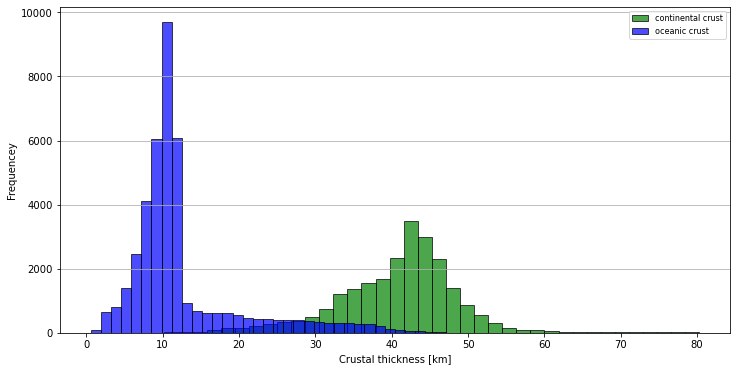

In [11]:
fname_fig = "Histogram of crustal thickness"

fig, ax = plt.subplots(1, 1, figsize=(12,6))
#n,bins,patches = ax.hist(cthickness,bins=8)
ax.hist(cthickness[~is_ocean].flatten(),bins=40, facecolor="green", edgecolor="black", alpha=0.7,label="continental crust")
ax.hist(cthickness[is_ocean].flatten(),bins=40, facecolor="blue", edgecolor="black", alpha=0.7,label="oceanic crust")
ax.set_xlabel("Crustal thickness [km]")
ax.set_ylabel("Frequencey")
ax.grid(axis="y")
#ax.set_title(fname_fig)
plt.legend(loc = 'upper right',prop = {'size':8}) 
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not posit

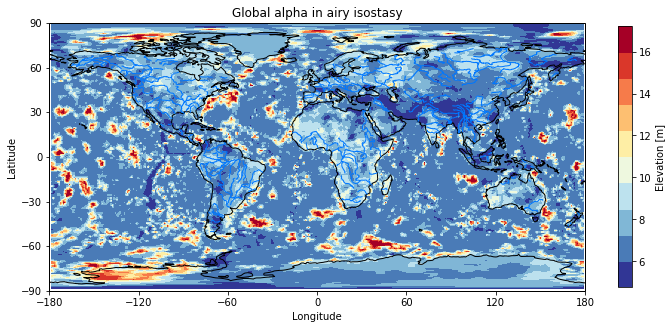

In [12]:
fname_fig = "Global alpha in airy isostasy"
cmap = plt.cm.get_cmap('RdYlBu_r', 10)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(alpha,origin='lower',cmap=cmap,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label="Elevation [m]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

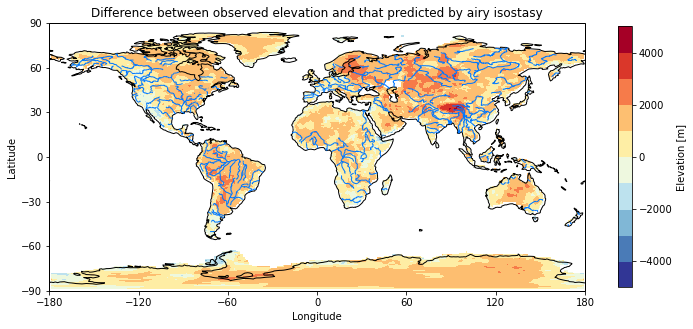

In [13]:
is_area = is_ocean
dtopo_area = dtopo.copy().astype(float)
dtopo_area[is_ocean] = np.nan
dtopo_area[rho_m<0]=np.nan
data_img= dtopo_area

fname_fig = "Difference between observed elevation and that predicted by airy isostasy"
cmap = plt.cm.get_cmap('RdYlBu_r', 10)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(data_img,origin='lower',cmap=cmap,vmin =-5000,vmax =5000,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label="Elevation [m]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

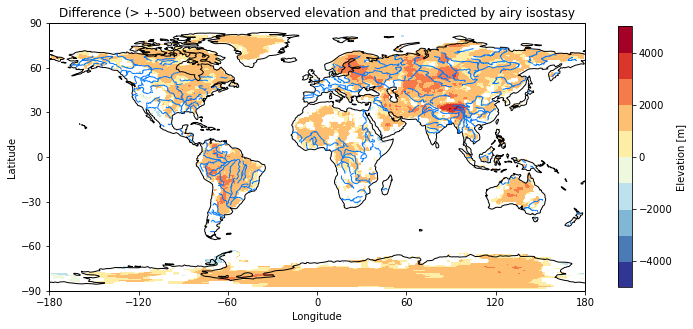

In [14]:
is_area = is_ocean
dtopo_area = dtopo.copy().astype(float)
dtopo_area[np.abs(dtopo_area)<500]=np.nan
dtopo_area[is_ocean] = np.nan
dtopo_area[rho_m<0]=np.nan
data_img= dtopo_area

fname_fig = "Difference (> +-500) between observed elevation and that predicted by airy isostasy"
cmap = plt.cm.get_cmap('RdYlBu_r', 10)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(data_img,origin='lower',cmap=cmap,vmin =-5000,vmax =5000,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label="Elevation [m]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

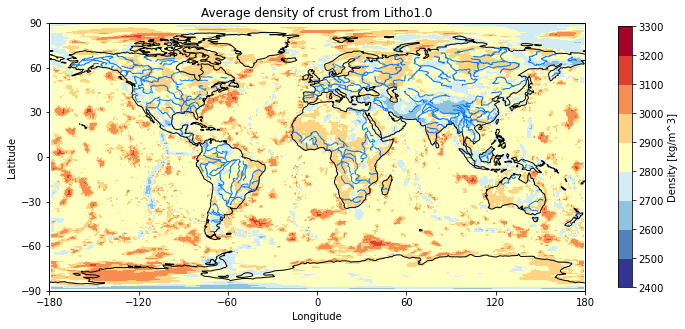

In [15]:
data_img= rho_c.copy()
fname_fig = "Average density of crust from Litho1.0"
cmap = plt.cm.get_cmap('RdYlBu_r', 9)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(data_img,origin='lower',cmap=cmap,vmin=2400,vmax=3300,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

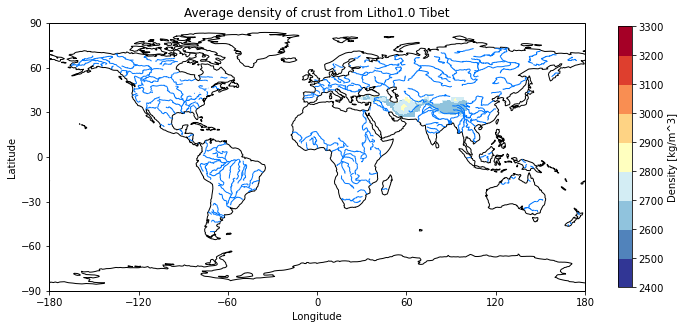

In [16]:
is_area = is_Tibet
data_img= rho_c.copy()
data_img[~is_area] = np.nan

fname_fig = "Average density of crust from Litho1.0 Tibet"
cmap = plt.cm.get_cmap('RdYlBu_r', 9)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(data_img,origin='lower',cmap=cmap,vmin=2400,vmax=3300,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

In [17]:
rho_c[~is_ocean].mean(),rho_c[is_Tibet].mean(),rho_c[is_Andes].mean(),rho_c[is_craton].mean()

(2858.5573211195233, 2720.7488008285986, 2824.526610192199, 2868.6755778984434)

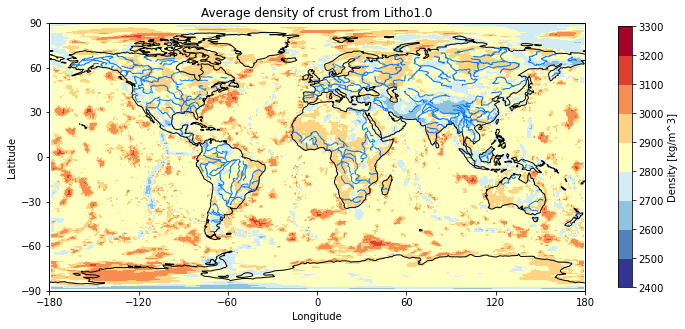

In [18]:
fname_fig = "Average density of crust from Litho1.0"
cmap = plt.cm.get_cmap('RdYlBu_r', 9)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(rho_c ,origin='lower',cmap=cmap,vmin=2400,vmax=3300,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

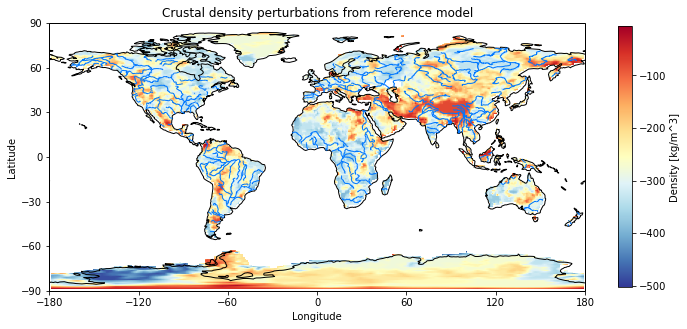

In [19]:
fname_fig = "Crustal density perturbations from reference model"
cmap = plt.cm.get_cmap('RdYlBu_r')
ref_rho_c = 2600
data_img = -rho_c.copy()+ref_rho_c
data_img[is_ocean] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(data_img ,origin='lower',cmap=cmap,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

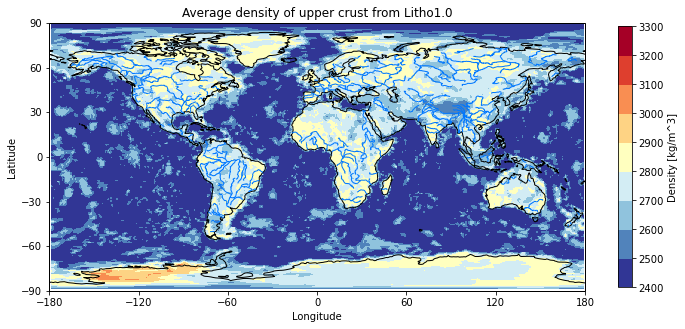

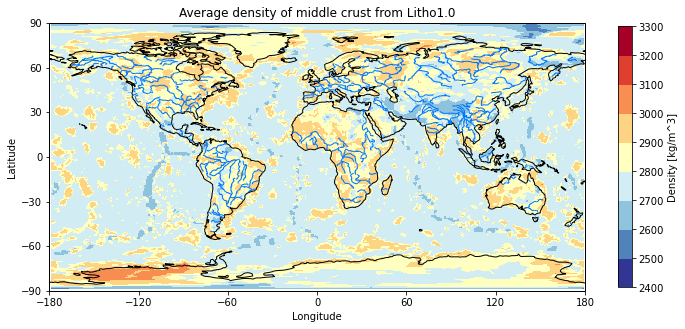

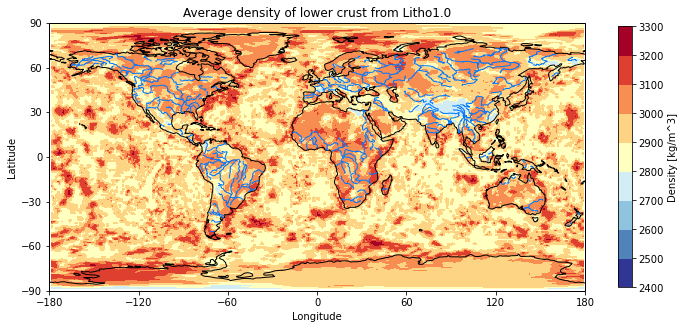

In [20]:
fname_fig = "Average density of upper crust from Litho1.0"
cmap = plt.cm.get_cmap('RdYlBu_r', 9)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(rho_c1 ,origin='lower',cmap=cmap,vmin=2400,vmax=3300,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

fname_fig = "Average density of middle crust from Litho1.0"
cmap = plt.cm.get_cmap('RdYlBu_r', 9)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(rho_c2 ,origin='lower',cmap=cmap,vmin=2400,vmax=3300,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

fname_fig = "Average density of lower crust from Litho1.0"
cmap = plt.cm.get_cmap('RdYlBu_r', 9)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
ax.set_global()
m=ax.imshow(rho_c3 ,origin='lower',cmap=cmap,vmin=2400,vmax=3300,extent=extent_global, transform=prj_base)
#norm=norm_litho1 
ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)
cbr = plt.colorbar(mappable=m,shrink=0.8,label= "Density [kg/m^3]") #, orientation='horizontal', shrink=0.8)
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')